In [ ]:
#!wget https://zenodo.org/record/4281122/files/AI_Ready_DMSP_Data.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/TMLC

/content/drive/MyDrive/TMLC


In [ ]:
pwd

'/content/drive/MyDrive/TMLC'

## Importing Importing Libraries

In [ ]:
import numpy as np
import os
import pandas as pd

import datetime
from os.path import isfile, join
from sys import getsizeof
import glob


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

from random import *

import time

from pickle import dump
import joblib

# from keras import backend as K
import keras as k
from keras import utils, models, layers, optimizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.layers import Dense, GRU, BatchNormalization, Activation, LSTM, Flatten
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from keras.models import Sequential

## Importing the dataset

In [ ]:
# Reading the csv file
df = pd.read_csv('DMSP.csv')

In [ ]:
# printing first few rows of the dataset
df.head()

Datetimes  SC_AACGM_LAT  SC_AACGM_LTIME  ELE_TOTAL_ENERGY_FLUX  \
0  1987-01-12 12:57:00     51.143220        5.664024           2.057827e+08   
1  1987-01-12 12:58:00     54.137207        5.535848           2.509837e+08   
2  1987-01-12 13:01:00     62.928176        5.031172           4.469146e+08   
3  1987-01-12 13:02:00     65.719631        4.794780           1.934849e+10   
4  1987-01-12 13:03:00     68.392364        4.507448           3.913337e+11   

   ELE_TOTAL_ENERGY_FLUX_STD  ELE_AVG_ENERGY  ELE_AVG_ENERGY_STD  ID_SC  \
0                   0.411230        39.89341            0.411485    6.0   
1                   0.478268        40.82392            0.478568    6.0   
2                   0.603362       143.77360            0.604023    6.0   
3                   0.103648       820.36560            0.103671    6.0   
4                   0.114959      5291.57100            0.114959    6.0   

     sin_ut    cos_ut  ...  AE_5min  AL_5min  AU_5min  SymH_5min  PC_5min  \
0 -0.246153 -0.969231  ...     86.0    -61.0     25.0        3.0     0.77   
1 -0.250380 -0.968148  ...     86.0    -61.0     25.0        3.0     0.77   
2 -0.263031 -0.964787  ...     82.0    -58.0     24.0        3.0     0.77   
3 -0.267238 -0.963630  ...     82.0    -58.0     24.0        3.0     0.77   
4 -0.271440 -0.962455  ...     82.0    -58.0     24.0        3.0     0.77   

   vsw_5min  vx_5min  psw_5min  borovsky_5min  newell_5min  
0     356.0   -355.5      2.96   17439.640589  2489.686963  
1     356.0   -355.5      2.96   17439.640589  2489.686963  
2     354.7   -354.1      3.20   14199.368957  1847.748015  
3     354.7   -354.1      3.20   14199.368957  1847.748015  
4     354.7   -354.1      3.20   14199.368957  1847.748015  

[5 rows x 154 columns]

In [ ]:
df.shape

(208228, 154)

In [ ]:
# creating the copy of the dataset
df_cumulative = df.copy()

In [ ]:
# changing the date column into datetime format
df_cumulative = df_cumulative.set_index('Datetimes')
df_cumulative.index = pd.to_datetime(df_cumulative.index)

In [ ]:
# list the columns 
df_cumulative.columns.to_list()

['SC_AACGM_LAT',
 'SC_AACGM_LTIME',
 'ELE_TOTAL_ENERGY_FLUX',
 'ELE_TOTAL_ENERGY_FLUX_STD',
 'ELE_AVG_ENERGY',
 'ELE_AVG_ENERGY_STD',
 'ID_SC',
 'sin_ut',
 'cos_ut',
 'sin_doy',
 'cos_doy',
 'sin_SC_AACGM_LTIME',
 'cos_SC_AACGM_LTIME',
 'F107',
 'Bz',
 'By',
 'Bx',
 'AE',
 'AL',
 'AU',
 'SymH',
 'PC',
 'vsw',
 'vx',
 'psw',
 'borovsky',
 'newell',
 'F107_6hr',
 'Bz_6hr',
 'By_6hr',
 'Bx_6hr',
 'AE_6hr',
 'AL_6hr',
 'AU_6hr',
 'SymH_6hr',
 'PC_6hr',
 'vsw_6hr',
 'vx_6hr',
 'psw_6hr',
 'borovsky_6hr',
 'newell_6hr',
 'F107_5hr',
 'Bz_5hr',
 'By_5hr',
 'Bx_5hr',
 'AE_5hr',
 'AL_5hr',
 'AU_5hr',
 'SymH_5hr',
 'PC_5hr',
 'vsw_5hr',
 'vx_5hr',
 'psw_5hr',
 'borovsky_5hr',
 'newell_5hr',
 'F107_3hr',
 'Bz_3hr',
 'By_3hr',
 'Bx_3hr',
 'AE_3hr',
 'AL_3hr',
 'AU_3hr',
 'SymH_3hr',
 'PC_3hr',
 'vsw_3hr',
 'vx_3hr',
 'psw_3hr',
 'borovsky_3hr',
 'newell_3hr',
 'F107_1hr',
 'Bz_1hr',
 'By_1hr',
 'Bx_1hr',
 'AE_1hr',
 'AL_1hr',
 'AU_1hr',
 'SymH_1hr',
 'PC_1hr',
 'vsw_1hr',
 'vx_1hr',
 'psw_1hr',
 '

In [ ]:
# Choose columns to drop
cols_to_drop = [c for c in df_cumulative.columns if ('1min' in c) | ('3min' in c) | ('4min' in c) | ('_5min'in c) | ('15min' in c)| ('5hr' in c) | ('F107_' in c) | ('vx' in c) | ('AE' in c) | ('newell' in c) | ('borovsky' in c) | ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]
df_cumulative = df_cumulative.drop(columns=cols_to_drop)

In [ ]:
# List the new set of columns
df_cumulative.columns.to_list()

['SC_AACGM_LAT',
 'ELE_TOTAL_ENERGY_FLUX',
 'ID_SC',
 'sin_ut',
 'cos_ut',
 'sin_doy',
 'cos_doy',
 'sin_SC_AACGM_LTIME',
 'cos_SC_AACGM_LTIME',
 'F107',
 'Bz',
 'By',
 'Bx',
 'AL',
 'AU',
 'SymH',
 'PC',
 'vsw',
 'psw',
 'Bz_6hr',
 'By_6hr',
 'Bx_6hr',
 'AL_6hr',
 'AU_6hr',
 'SymH_6hr',
 'PC_6hr',
 'vsw_6hr',
 'psw_6hr',
 'Bz_3hr',
 'By_3hr',
 'Bx_3hr',
 'AL_3hr',
 'AU_3hr',
 'SymH_3hr',
 'PC_3hr',
 'vsw_3hr',
 'psw_3hr',
 'Bz_1hr',
 'By_1hr',
 'Bx_1hr',
 'AL_1hr',
 'AU_1hr',
 'SymH_1hr',
 'PC_1hr',
 'vsw_1hr',
 'psw_1hr',
 'Bz_45min',
 'By_45min',
 'Bx_45min',
 'AL_45min',
 'AU_45min',
 'SymH_45min',
 'PC_45min',
 'vsw_45min',
 'psw_45min',
 'Bz_30min',
 'By_30min',
 'Bx_30min',
 'AL_30min',
 'AU_30min',
 'SymH_30min',
 'PC_30min',
 'vsw_30min',
 'psw_30min',
 'Bz_10min',
 'By_10min',
 'Bx_10min',
 'AL_10min',
 'AU_10min',
 'SymH_10min',
 'PC_10min',
 'vsw_10min',
 'psw_10min']

In [ ]:
print('number of input features total = {}'.format(df_cumulative.shape[1]))

number of input features total = 73


In [ ]:
# Define the threshold above which to remove energy flux values
eflux_threshold_quantile = 99.995
eflux_threshold = .99995

# Define the conversion factor from eV to erg
erg_eV_factor = (1.60218e-12)

In [ ]:
# Remove outliers

print(df_cumulative.shape)
threshold_drop_val = np.percentile(df_cumulative['ELE_TOTAL_ENERGY_FLUX'],eflux_threshold_quantile)
print('... dropping rows where total electron energy flux is greater than {:.4E} [eV/cm2/s/ster]'.format(threshold_drop_val))
print('--------> number dropped = {}'.format(len( np.argwhere(df_cumulative['ELE_TOTAL_ENERGY_FLUX'].values > threshold_drop_val) )))
#df_cumulative_LTIMEs = df_cumulative.LTIMEs[ (df_cumulative['ELE_TOTAL_ENERGY_FLUX'].values < threshold_drop_val) ]
#df_cumulative_STDs = df_cumulative.STDs[ (df_cumulative['ELE_TOTAL_ENERGY_FLUX'].values < threshold_drop_val) ]
df_cumulative = df_cumulative[ (df_cumulative['ELE_TOTAL_ENERGY_FLUX'].values < threshold_drop_val) ]
print(df_cumulative.shape)

(208228, 73)
... dropping rows where total electron energy flux is greater than 7.4150E+15 [eV/cm2/s/ster]
--------> number dropped = 11
(208217, 73)


In [ ]:
df_cumulative.describe()

SC_AACGM_LAT  ELE_TOTAL_ENERGY_FLUX          ID_SC         sin_ut  \
count  208217.000000           2.082170e+05  208217.000000  208217.000000   
mean       65.267752           2.847819e+11      13.459093      -0.012206   
std        11.090059           3.070260e+13       1.125163       0.703339   
min        45.000165           6.229923e+06       6.000000      -1.000000   
25%        56.075574           3.470093e+08      13.000000      -0.713250   
50%        65.979412           7.764022e+08      13.000000      -0.017452   
75%        74.029360           1.074914e+10      14.000000       0.685183   
max        89.970914           6.836466e+15      15.000000       1.000000   

              cos_ut        sin_doy        cos_doy  sin_SC_AACGM_LTIME  \
count  208217.000000  208217.000000  208217.000000       208217.000000   
mean        0.004876      -0.314165      -0.148397            0.030203   
std         0.710736       0.623024       0.700803            0.800070   
min        -1.000000      -0.999917      -0.999963           -1.000000   
25%        -0.710185      -0.835925      -0.809017           -0.867595   
50%         0.013090      -0.501242      -0.333469            0.199659   
75%         0.719340      -0.034422       0.541628            0.864349   
max         1.000000       0.999991       1.000000            1.000000   

       cos_SC_AACGM_LTIME           F107  ...      psw_30min       Bz_10min  \
count       208217.000000  208217.000000  ...  208217.000000  208216.000000   
mean            -0.092822     187.363209  ...       1.956807       1.211389   
std              0.591915      37.443898  ...       1.694456       3.462767   
min             -1.000000      68.900000  ...       0.010000      -8.420000   
25%             -0.593250     159.100000  ...       1.060000      -1.050000   
50%             -0.136915     186.300000  ...       1.520000       0.980000   
75%              0.398755     215.000000  ...       2.280000       3.050000   
max              1.000000     285.500000  ...      47.000000      55.470000   

            By_10min       Bx_10min       AL_10min       AU_10min  \
count  208216.000000  208216.000000  208216.000000  208216.000000   
mean       -0.001882      -0.236602     -77.717409      60.302791   
std         4.425548       3.865403      83.829603      52.073164   
min       -23.990000     -17.440000    -688.000000     -29.000000   
25%        -3.220000      -3.180000    -102.000000      23.000000   
50%         0.030000      -0.400000     -44.000000      44.000000   
75%         3.230000       2.820000     -24.000000      81.000000   
max        23.460000      37.310000      27.000000     379.000000   

          SymH_10min       PC_10min      vsw_10min      psw_10min  
count  208216.000000  208216.000000  208216.000000  208216.000000  
mean      -10.206166       0.581032     411.359023       1.961959  
std        16.808322       1.115066      73.970862       1.710257  
min      -135.000000      -8.120000     261.600000       0.020000  
25%       -17.000000      -0.090000     361.200000       1.060000  
50%        -9.000000       0.420000     401.500000       1.510000  
75%        -1.000000       1.200000     443.900000       2.290000  
max        69.000000      10.350000     832.300000      45.760000  

[8 rows x 73 columns]

In [ ]:
df_cumulative.head()

SC_AACGM_LAT  ELE_TOTAL_ENERGY_FLUX  ID_SC    sin_ut  \
Datetimes                                                                   
1987-01-12 12:57:00     51.143220           2.057827e+08    6.0 -0.246153   
1987-01-12 12:58:00     54.137207           2.509837e+08    6.0 -0.250380   
1987-01-12 13:01:00     62.928176           4.469146e+08    6.0 -0.263031   
1987-01-12 13:02:00     65.719631           1.934849e+10    6.0 -0.267238   
1987-01-12 13:03:00     68.392364           3.913337e+11    6.0 -0.271440   

                       cos_ut   sin_doy  cos_doy  sin_SC_AACGM_LTIME  \
Datetimes                                                              
1987-01-12 12:57:00 -0.969231  0.205104  0.97874            0.996134   
1987-01-12 12:58:00 -0.968148  0.205104  0.97874            0.992626   
1987-01-12 13:01:00 -0.964787  0.205104  0.97874            0.968006   
1987-01-12 13:02:00 -0.963630  0.205104  0.97874            0.950633   
1987-01-12 13:03:00 -0.962455  0.205104  0.97874            0.924624   

                     cos_SC_AACGM_LTIME  F107  ...  psw_30min  Bz_10min  \
Datetimes                                      ...                        
1987-01-12 12:57:00            0.087845  68.9  ...       3.61      1.25   
1987-01-12 12:58:00            0.121216  68.9  ...       3.61      1.25   
1987-01-12 13:01:00            0.250928  68.9  ...       3.66      1.51   
1987-01-12 13:02:00            0.310316  68.9  ...       3.66      1.51   
1987-01-12 13:03:00            0.380881  68.9  ...       3.66      1.51   

                     By_10min  Bx_10min  AL_10min  AU_10min  SymH_10min  \
Datetimes                                                                 
1987-01-12 12:57:00      6.52     -3.03     -36.0      19.0         4.0   
1987-01-12 12:58:00      6.52     -3.03     -36.0      19.0         4.0   
1987-01-12 13:01:00      6.42     -2.72     -61.0      25.0         3.0   
1987-01-12 13:02:00      6.42     -2.72     -61.0      25.0         3.0   
1987-01-12 13:03:00      6.42     -2.72     -61.0      25.0         3.0   

                     PC_10min  vsw_10min  psw_10min  
Datetimes                                            
1987-01-12 12:57:00      0.71      364.4       3.09  
1987-01-12 12:58:00      0.71      364.4       3.09  
1987-01-12 13:01:00      0.77      356.0       2.96  
1987-01-12 13:02:00      0.77      356.0       2.96  
1987-01-12 13:03:00      0.77      356.0       2.96  

[5 rows x 73 columns]

In [ ]:
data = df_cumulative.copy()

In [ ]:
# Shape of the data
print(pd.Series({"Shape of the dataset": data.shape}).to_string())

Shape of the dataset    (208217, 73)


In [ ]:
# Count of observations
print(pd.Series({"Number of observations in the dataset": len(data)}).to_string())

Number of observations in the dataset    208217


In [ ]:
# Count of columns
print(pd.Series({"Total number of columns in the dataset": len(data.columns)}).to_string())

Total number of columns in the dataset    73


In [ ]:
# Column names
data.columns

Index(['SC_AACGM_LAT', 'ELE_TOTAL_ENERGY_FLUX', 'ID_SC', 'sin_ut', 'cos_ut',
       'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME',
       'F107', 'Bz', 'By', 'Bx', 'AL', 'AU', 'SymH', 'PC', 'vsw', 'psw',
       'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AL_6hr', 'AU_6hr', 'SymH_6hr', 'PC_6hr',
       'vsw_6hr', 'psw_6hr', 'Bz_3hr', 'By_3hr', 'Bx_3hr', 'AL_3hr', 'AU_3hr',
       'SymH_3hr', 'PC_3hr', 'vsw_3hr', 'psw_3hr', 'Bz_1hr', 'By_1hr',
       'Bx_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr', 'PC_1hr', 'vsw_1hr',
       'psw_1hr', 'Bz_45min', 'By_45min', 'Bx_45min', 'AL_45min', 'AU_45min',
       'SymH_45min', 'PC_45min', 'vsw_45min', 'psw_45min', 'Bz_30min',
       'By_30min', 'Bx_30min', 'AL_30min', 'AU_30min', 'SymH_30min',
       'PC_30min', 'vsw_30min', 'psw_30min', 'Bz_10min', 'By_10min',
       'Bx_10min', 'AL_10min', 'AU_10min', 'SymH_10min', 'PC_10min',
       'vsw_10min', 'psw_10min'],
      dtype='object')

In [ ]:
# Column datatypes
print(data.dtypes)

SC_AACGM_LAT             float64
ELE_TOTAL_ENERGY_FLUX    float64
ID_SC                    float64
sin_ut                   float64
cos_ut                   float64
                          ...   
AU_10min                 float64
SymH_10min               float64
PC_10min                 float64
vsw_10min                float64
psw_10min                float64
Length: 73, dtype: object


In [ ]:
# Count of column datatypes
cols_int = data.columns[data.dtypes == 'int64'].tolist()
cols_float = data.columns[data.dtypes == 'float64'].tolist()
cols_object = data.columns[data.dtypes == 'object'].tolist()
print(pd.Series({"Number of integer columns": len(cols_int),
                 "Number of float columns": len(cols_float),
                 "Number of object columns": len(cols_object)}).to_string())

Number of integer columns     0
Number of float columns      73
Number of object columns      0


In [ ]:
# Count of columns with missing values
print(pd.Series({"Number of columns with missing values in the dataset": len(data.isna().sum()[data.isna().sum() != 0])}).to_string())

Number of columns with missing values in the dataset    9


In [ ]:
# drop the row with missing value
data.dropna(inplace=True)

In [ ]:
data.shape

(208216, 73)

In [ ]:
# dropping columns with duplicate index
data = data[~data.index.duplicated()]

In [ ]:
data.shape

(159992, 73)

In [ ]:
# Setting the number of bins
import math
bins_fd = math.floor(len(data)**(1/3))

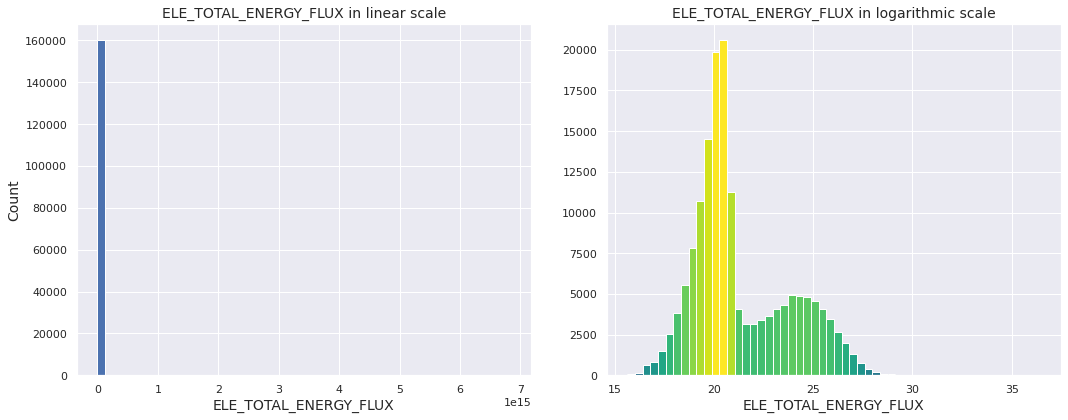

In [ ]:
from matplotlib import colors
# Creating histogram
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharey = False)
N, bins, patches = ax[0].hist(data['ELE_TOTAL_ENERGY_FLUX'], bins = bins_fd)
data['ELE_TOTAL_ENERGY_FLUX_LOG'] = np.log(data['ELE_TOTAL_ENERGY_FLUX'])
N, bins, patches = ax[1].hist(data['ELE_TOTAL_ENERGY_FLUX_LOG'], bins = bins_fd)
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

ax[0].set_title("ELE_TOTAL_ENERGY_FLUX in linear scale", fontsize = 14)
ax[0].set_xlabel("ELE_TOTAL_ENERGY_FLUX", fontsize = 14)
ax[0].set_ylabel("Count", fontsize = 14)
ax[1].set_title("ELE_TOTAL_ENERGY_FLUX in logarithmic scale", fontsize = 14)
ax[1].set_xlabel("ELE_TOTAL_ENERGY_FLUX", fontsize = 14)
ax[1].set_ylabel(" ", fontsize = 14)
plt.tight_layout()
plt.show()


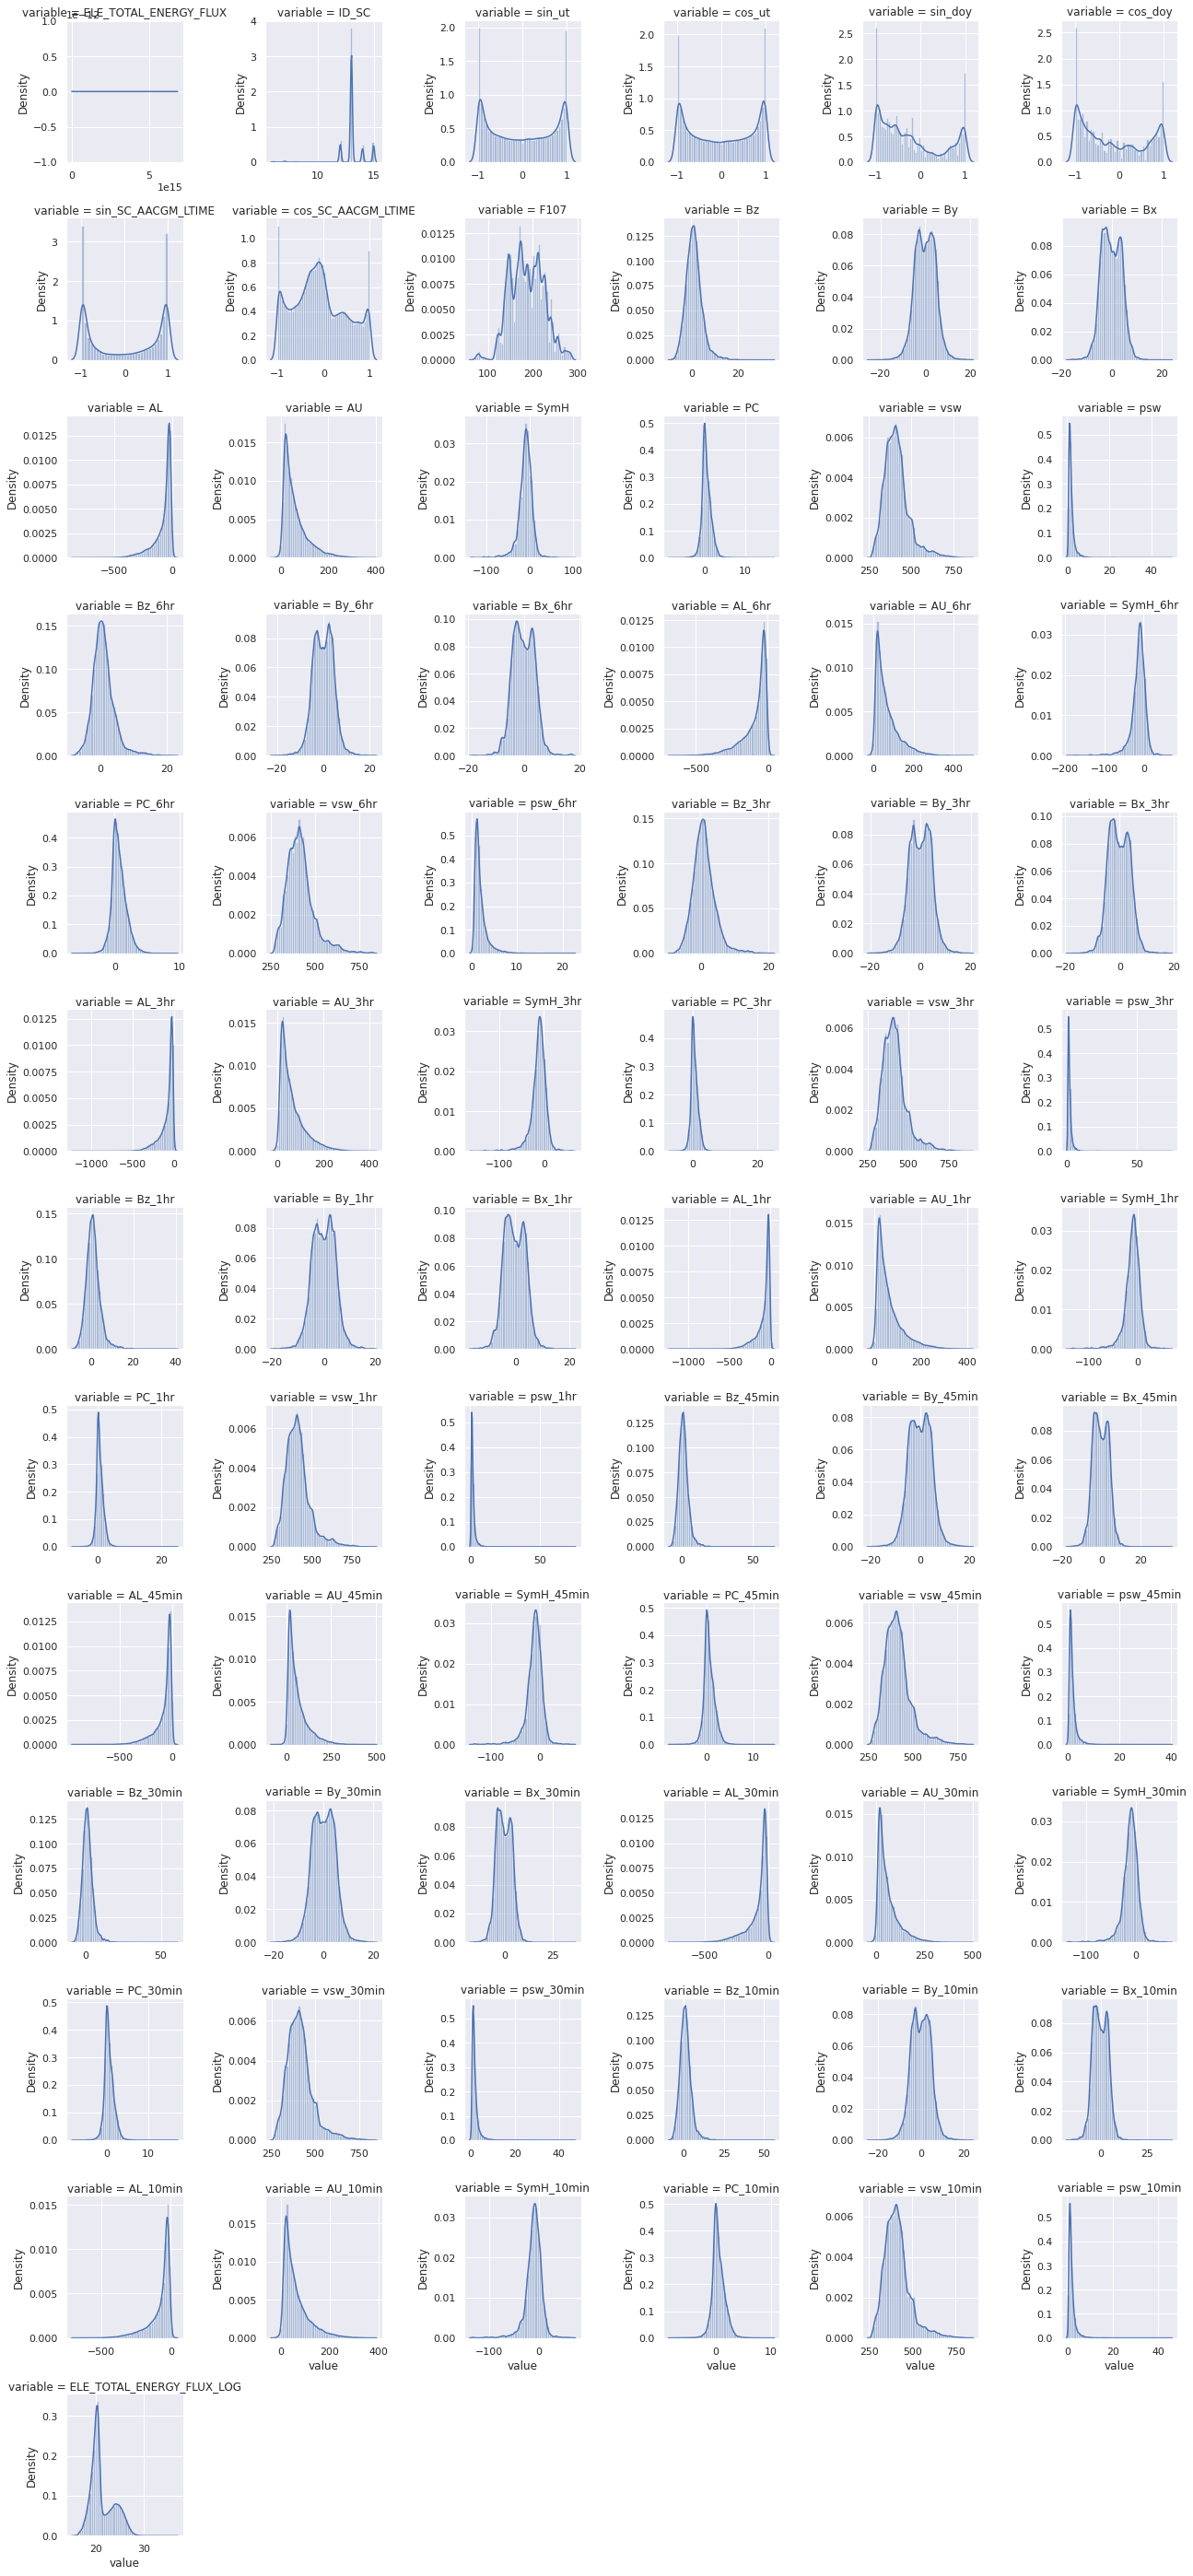

In [ ]:
unpivot = pd.melt(data, data.describe().columns[0], data.describe().columns[1:])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=6, sharex=False, sharey=False)
g.map(sns.distplot, "value")

plt.show()

Observations:

- Extremely skewed columns: ELE_AVG_ENERGY

- Moderately skewed columns: ELE_TOTAL_ENERGY_FLUX_STD, ELE_AVG_ENERGY_STD, F107, AE, AU, F107_6hr, AE_6hr, AU_6hr, psw_6hr, F107_5hr, AE_5hr, AU_5hr, PC_5hr, psw_5hr, F107_3hr, AE_3hr, AU_3hr, psw_3hr, F107_1hr, AE_1hr, AU_1hr, psw_1hr, F107_45min, AE_45min, AU_45min, psw_45min, F107_30min, AE_30min, AU_30min, psw_30min, F107_15min, AE_15min, AU_15min, psw_15min, F107_10min, AE_10min, AU_10min, psw_10min, F107_5min, AE_5min, AU_5min, psw_5min
Extremely leptokurtic columns: PC_6hr, PC_5hr, PC_3hr, PC_1hr

- Moderately skewed columns taking negative values: AL, psw, AL_6hr, AL_5hr, AL_3hr, AL_1hr, AL_45min, AL_30min, AL_15min, AL_10min, AL_5min

- Columns with zero-inflated distribution: borovsky, newell, borovsky_45min, newell_45min, borovsky_30min, newell_30min, borovsky_15min, newell_15min, borovsky_10min, newell_10min, borovsky_5min, newell_5min

In [ ]:
from tqdm import tqdm
# Dataframe of correlation coefficients of pairs of selected columns
def corr_df(df, cols):
    df_corr_coeff = pd.DataFrame(columns = ['feature_1', 'feature_2', 'corr_coeff'])
    for i in tqdm(range(len(cols)), desc = "Progress"):
        for j in range(len(cols)):
            if i<j:
                df_corr_coeff.loc[len(df_corr_coeff.index)] = [cols[i], cols[j], df[cols[i]].corr(df[cols[j]])]
    return df_corr_coeff.sort_values(by = 'corr_coeff', ascending = False)

In [ ]:
pd.set_option('display.max_rows', None)
# Correlation coefficients of pairs of numerical features
cols = [col for col in cols_float if col != 'ELE_TOTAL_ENERGY_FLUX']
df_corr_coeff = corr_df(data, cols)
display(df_corr_coeff)

Progress: 100%|██████████| 72/72 [00:11<00:00,  6.23it/s]


feature_1           feature_2  corr_coeff
956                 SymH          SymH_10min    0.993390
2158             vsw_1hr           vsw_45min    0.993248
1069                 vsw           vsw_10min    0.993036
2099            SymH_1hr          SymH_45min    0.991721
2333          SymH_45min          SymH_30min    0.990751
2374           vsw_45min           vsw_30min    0.990560
2509           vsw_30min           vsw_10min    0.988355
2167             vsw_1hr           vsw_30min    0.987680
2486          SymH_30min          SymH_10min    0.987025
1060                 vsw           vsw_30min    0.984779
2383           vsw_45min           vsw_10min    0.983227
2108            SymH_1hr          SymH_30min    0.982388
2176             vsw_1hr           vsw_10min    0.981827
1051                 vsw           vsw_45min    0.980476
947                 SymH          SymH_30min    0.979823
1042                 vsw             vsw_1hr    0.979567
2342          SymH_45min          SymH_10min    0.977699
1124                 psw           psw_10min    0.975172
1861             vsw_3hr             vsw_1hr    0.971177
938                 SymH          SymH_45min    0.970635
2117            SymH_1hr          SymH_10min    0.970191
1483             vsw_6hr             vsw_3hr    0.965678
1870             vsw_3hr           vsw_45min    0.965539
2393           psw_45min           psw_30min    0.964063
929                 SymH            SymH_1hr    0.962847
1879             vsw_3hr           vsw_30min    0.961833
2519           psw_30min           psw_10min    0.957537
1888             vsw_3hr           vsw_10min    0.957475
1033                 vsw             vsw_3hr    0.955387
898                   AU            AU_10min    0.950523
2186             psw_1hr           psw_45min    0.947557
779                   Bx            Bx_10min    0.942513
1492             vsw_6hr             vsw_1hr    0.940920
2003              Bx_1hr            Bx_45min    0.939987
1115                 psw           psw_30min    0.938922
1013                  PC            PC_10min    0.938775
718                   By            By_10min    0.937603
1969              By_1hr            By_45min    0.937033
1501             vsw_6hr           vsw_45min    0.935241
2068              AU_1hr            AU_45min    0.933336
1510             vsw_6hr           vsw_30min    0.931059
2402           psw_45min           psw_10min    0.929190
2195             psw_1hr           psw_30min    0.928217
1784            SymH_3hr            SymH_1hr    0.928034
839                   AL            AL_10min    0.927470
1519             vsw_6hr           vsw_10min    0.926739
1024                 vsw             vsw_6hr    0.924819
2264            Bx_45min            Bx_30min    0.923066
2311            AU_45min            AU_30min    0.921533
2239            By_45min            By_30min    0.921057
1388            SymH_6hr            SymH_3hr    0.916065
1793            SymH_3hr          SymH_45min    0.914151
1106                 psw           psw_45min    0.911719
2129              PC_1hr            PC_45min    0.907352
1802            SymH_3hr          SymH_30min    0.906672
2444            Bx_30min            Bx_10min    0.902874
2036              AL_1hr            AL_45min    0.900821
1811            SymH_3hr          SymH_10min    0.897997
2204             psw_1hr           psw_10min    0.896387
2428            By_30min            By_10min    0.896264
2473            AU_30min            AU_10min    0.896259
1097                 psw             psw_1hr    0.894369
2354            PC_45min            PC_30min    0.893958
920                 SymH            SymH_3hr    0.892765
2012              Bx_1hr            Bx_30min    0.890752
1978              By_1hr            By_30min    0.889243
2288            AL_45min            AL_30min    0.887989
656                   Bz            Bz_10min    0.885478
1934              Bz_1hr            Bz_45min    0.881816
770                   Bx 

In [ ]:
import plotly.express as px
num_bins = math.floor(len(df_corr_coeff)**(1/2))
df = px.data.tips()
fig = px.histogram(df_corr_coeff, x='corr_coeff', nbins=num_bins, color_discrete_sequence=['indianred'], \
                   title="Correlation coefficient of numerical features")
fig.show()

Observations:

In total there are 2556 pairs of numerical features

- No significant correlation  
(|r| < 0.01) :1080 pairs

- Weak correlation  
(0.01 ≤ |r| < 0.3) : 1237 pairs

- Moderate correlation  
(0.3 ≤ |r| < 0.7) : 119 pairs

- Strong correlation  
(0.7 ≤ |r| < 0.9) : 63 pairs

- Extremely strong correlation  
(0.9 ≤ |r|) : 57 pairs


## Model Building

In [ ]:
# separate training data and validation data
mask_val = [(df_cumulative.index.year == 2002) & (df_cumulative['ID_SC'].values==13)]

In [ ]:
# storing the data of the year 2002 as a validation set
df_val = df_cumulative[mask_val[0]].copy(deep=True)
df_val.head()

SC_AACGM_LAT  ELE_TOTAL_ENERGY_FLUX  ID_SC    sin_ut  \
Datetimes                                                                   
2002-01-01 13:00:00     87.102285           3.254178e+09   13.0 -0.258819   
2002-01-01 13:01:00     84.240306           2.043148e+08   13.0 -0.263031   
2002-01-01 13:02:00     81.120657           1.193426e+11   13.0 -0.267238   
2002-01-01 13:03:00     77.943089           2.837295e+10   13.0 -0.271440   
2002-01-01 13:04:00     74.739148           6.009746e+10   13.0 -0.275637   

                       cos_ut   sin_doy   cos_doy  sin_SC_AACGM_LTIME  \
Datetimes                                                               
2002-01-01 13:00:00 -0.965926  0.017213  0.999852           -0.824183   
2002-01-01 13:01:00 -0.964787  0.017213  0.999852           -0.974897   
2002-01-01 13:02:00 -0.963630  0.017213  0.999852           -0.994684   
2002-01-01 13:03:00 -0.962455  0.017213  0.999852           -0.999060   
2002-01-01 13:04:00 -0.961262  0.017213  0.999852           -0.999981   

                     cos_SC_AACGM_LTIME   F107  ...  psw_30min  Bz_10min  \
Datetimes                                       ...                        
2002-01-01 13:00:00           -0.566324  224.5  ...       1.29     -0.87   
2002-01-01 13:01:00           -0.222658  224.5  ...       1.29     -0.87   
2002-01-01 13:02:00           -0.102976  224.5  ...       1.29     -0.87   
2002-01-01 13:03:00           -0.043348  224.5  ...       1.29     -0.87   
2002-01-01 13:04:00           -0.006218  224.5  ...       1.29     -0.87   

                     By_10min  Bx_10min  AL_10min  AU_10min  SymH_10min  \
Datetimes                                                                 
2002-01-01 13:00:00      1.58      6.58     -45.0      75.0       -26.0   
2002-01-01 13:01:00      1.58      6.58     -45.0      75.0       -26.0   
2002-01-01 13:02:00      1.58      6.58     -45.0      75.0       -26.0   
2002-01-01 13:03:00      1.58      6.58     -45.0      75.0       -26.0   
2002-01-01 13:04:00      1.58      6.58     -45.0      75.0       -26.0   

                     PC_10min  vsw_10min  psw_10min  
Datetimes                                            
2002-01-01 13:00:00      1.13      426.1       1.38  
2002-01-01 13:01:00      1.13      426.1       1.38  
2002-01-01 13:02:00      1.13      426.1       1.38  
2002-01-01 13:03:00      1.13      426.1       1.38  
2002-01-01 13:04:00      1.13      426.1       1.38  

[5 rows x 73 columns]

In [ ]:
# storing rest of the data as training data
df_train = df_cumulative.copy(deep=True).drop( df_cumulative.index[mask_val[0]])
df_train.head()

SC_AACGM_LAT  ELE_TOTAL_ENERGY_FLUX  ID_SC    sin_ut  \
Datetimes                                                                   
1987-01-12 12:57:00     51.143220           2.057827e+08    6.0 -0.246153   
1987-01-12 12:58:00     54.137207           2.509837e+08    6.0 -0.250380   
1987-01-12 13:01:00     62.928176           4.469146e+08    6.0 -0.263031   
1987-01-12 13:02:00     65.719631           1.934849e+10    6.0 -0.267238   
1987-01-12 13:03:00     68.392364           3.913337e+11    6.0 -0.271440   

                       cos_ut   sin_doy  cos_doy  sin_SC_AACGM_LTIME  \
Datetimes                                                              
1987-01-12 12:57:00 -0.969231  0.205104  0.97874            0.996134   
1987-01-12 12:58:00 -0.968148  0.205104  0.97874            0.992626   
1987-01-12 13:01:00 -0.964787  0.205104  0.97874            0.968006   
1987-01-12 13:02:00 -0.963630  0.205104  0.97874            0.950633   
1987-01-12 13:03:00 -0.962455  0.205104  0.97874            0.924624   

                     cos_SC_AACGM_LTIME  F107  ...  psw_30min  Bz_10min  \
Datetimes                                      ...                        
1987-01-12 12:57:00            0.087845  68.9  ...       3.61      1.25   
1987-01-12 12:58:00            0.121216  68.9  ...       3.61      1.25   
1987-01-12 13:01:00            0.250928  68.9  ...       3.66      1.51   
1987-01-12 13:02:00            0.310316  68.9  ...       3.66      1.51   
1987-01-12 13:03:00            0.380881  68.9  ...       3.66      1.51   

                     By_10min  Bx_10min  AL_10min  AU_10min  SymH_10min  \
Datetimes                                                                 
1987-01-12 12:57:00      6.52     -3.03     -36.0      19.0         4.0   
1987-01-12 12:58:00      6.52     -3.03     -36.0      19.0         4.0   
1987-01-12 13:01:00      6.42     -2.72     -61.0      25.0         3.0   
1987-01-12 13:02:00      6.42     -2.72     -61.0      25.0         3.0   
1987-01-12 13:03:00      6.42     -2.72     -61.0      25.0         3.0   

                     PC_10min  vsw_10min  psw_10min  
Datetimes                                            
1987-01-12 12:57:00      0.71      364.4       3.09  
1987-01-12 12:58:00      0.71      364.4       3.09  
1987-01-12 13:01:00      0.77      356.0       2.96  
1987-01-12 13:02:00      0.77      356.0       2.96  
1987-01-12 13:03:00      0.77      356.0       2.96  

[5 rows x 73 columns]

In [ ]:
# dropping one null row in validation set
df_val.dropna(inplace=True)

In [ ]:
print('validation data shape = {}'.format(df_val.shape))
print('train data shape = {}'.format(df_train.shape))
print('NOTE: we have called the withheld data *validation* data here')

validation data shape = (61200, 73)
train data shape = (146931, 73)
NOTE: we have called the withheld data *validation* data here


In [ ]:
# Construct X and y
from sklearn.preprocessing import StandardScaler
feature_cols = [c for c in df_cumulative.columns if not 'ELE' in c]

X_val = df_val[feature_cols].copy(deep=True)
y_val = df_val['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train[feature_cols].copy(deep=True)
y_train = df_train['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = StandardScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

In [ ]:
train_cols = X_train.columns.to_list()

In [ ]:
X_train_scaled

array([[-1.30186897, -5.92397314, -0.34384096, ...,  0.09523256,
        -0.54847415,  0.60543444],
       [-1.03008105, -5.92397314, -0.34985504, ...,  0.09523256,
        -0.54847415,  0.60543444],
       [-0.23205524, -5.92397314, -0.36785615, ...,  0.15030447,
        -0.66353677,  0.53624339],
       ...,
       [-1.72867869, -1.27842581, -1.39796897, ..., -1.4467809 ,
        -0.53340643, -0.043897  ],
       [-0.83030017, -1.27842581, -1.40084246, ..., -2.42889662,
        -0.51559912,  0.06787316],
       [ 1.25085749, -1.27842581, -1.33277228, ..., -0.13423373,
        -0.4388907 ,  0.06255078]])

In [ ]:
# The units of the energy flux are eV/cm2/s/ster
#   --> To remove the 'steradian' multiply by PI (see: https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1002/2016JA023339)
y_train = y_train * np.pi
y_val = y_val * np.pi
print('NOTE: removing the steradian from the DMSP data BEFORE training')

# Create targets in erg/cm2/s units to explore target in different units
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

# Create targets in log10(eV/cm2/s) units to explore target in different units
y_train[y_train == 0] = 0.00001
y_val[y_val == 0] = 0.00001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))

NOTE: removing the steradian from the DMSP data BEFORE training


In [ ]:
X_train_scaled.shape

(146931, 72)

In [ ]:
# creating the dataframe with X_train_scaled values
X_train_df = pd.DataFrame(X_train_scaled, columns = train_cols)
X_train_df.head()

SC_AACGM_LAT     ID_SC    sin_ut    cos_ut   sin_doy   cos_doy  \
0     -1.301869 -5.923973 -0.343841 -1.361824  1.681851  1.513502   
1     -1.030081 -5.923973 -0.349855 -1.360301  1.681851  1.513502   
2     -0.232055 -5.923973 -0.367856 -1.355577  1.681851  1.513502   
3      0.021347 -5.923973 -0.373842 -1.353951  1.681851  1.513502   
4      0.263972 -5.923973 -0.379821 -1.352299  1.681851  1.513502   

   sin_SC_AACGM_LTIME  cos_SC_AACGM_LTIME      F107        Bz  ...  psw_30min  \
0            1.245630            0.297136 -2.955913  0.478327  ...   0.897568   
1            1.241081            0.350279 -2.955913  0.478327  ...   0.897568   
2            1.209154            0.556843 -2.955913  0.013718  ...   0.924498   
3            1.186625            0.651419 -2.955913  0.013718  ...   0.924498   
4            1.152897            0.763792 -2.955913  0.013718  ...   0.924498   

   Bz_10min  By_10min  Bx_10min  AL_10min  AU_10min  SymH_10min  PC_10min  \
0  0.035120  1.496596 -0.770517  0.487659 -0.778898    0.744164  0.095233   
1  0.035120  1.496596 -0.770517  0.487659 -0.778898    0.744164  0.095233   
2  0.108239  1.473562 -0.686390  0.196094 -0.664302    0.689348  0.150304   
3  0.108239  1.473562 -0.686390  0.196094 -0.664302    0.689348  0.150304   
4  0.108239  1.473562 -0.686390  0.196094 -0.664302    0.689348  0.150304   

   vsw_10min  psw_10min  
0  -0.548474   0.605434  
1  -0.548474   0.605434  
2  -0.663537   0.536243  
3  -0.663537   0.536243  
4  -0.663537   0.536243  

[5 rows x 72 columns]

In [ ]:
# creating the function for calculation of R2-score
from keras import backend as K
def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Model 1

In [ ]:
# LeakyReLU activation function is used instead of ReLU since the input features have negative values as well
import keras
model1 = Sequential()
model1.add(Dense(128, input_shape=(X_train_scaled.shape[1:]), activation = keras.layers.LeakyReLU(alpha=0.01)))

model1.add(Dense(64, activation=keras.layers.LeakyReLU(alpha=0.01)))

model1.add(Dense(32, activation=keras.layers.LeakyReLU(alpha=0.01)))

model1.add(Dense(1, activation='linear'))
# Compile the model
opt = Adam() # specifying the optimizer used for the model
model1.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])


In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               9344      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 19,713
Trainable params: 19,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
curr_dt_time = datetime.datetime.now()
# spefying the format in which model needs to be saved
model_name = 'DMSP1' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
 # giving the file path       
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'
# Creating the call back for saving only the best models 
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# creating the callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history = model1.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=50, batch_size=64, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/50
2282/2296 [============================>.] - ETA: 0s - loss: 4.1899 - root_mean_squared_error: 2.0469 - r2_score: -2.7304
Epoch 1: val_loss improved from inf to 7.89362, saving model to DMSP1_2022-09-0304_50_35.698783/model-00001-4.20922-2.05164-7.89362-2.80956.h5
2296/2296 [==============================] - 10s 4ms/step - loss: 4.2092 - root_mean_squared_error: 2.0516 - r2_score: -2.7535 - val_loss: 7.8936 - val_root_mean_squared_error: 2.8096 - val_r2_score: -7.0862
Epoch 2/50
2289/2296 [============================>.] - ETA: 0s - loss: 1.6859 - root_mean_squared_error: 1.2984 - r2_score: -0.5116
Epoch 2: val_loss improved from 7.89362 to 3.20109, saving model to DMSP1_2022-09-0304_50_35.698783/model-00002-1.69519-1.30199-3.20109-1.78916.h5
2296/2296 [==============================] - 9s 4ms/step - loss: 1.6952 - root_mean_squared_error: 1.3020 - r2_score: -0.5182 - val_loss: 3.2011 - val_root_mean_squared_error: 1.7892 - val_r2_score: -2.2322
Epoch 3/50
2295/2296 [=======

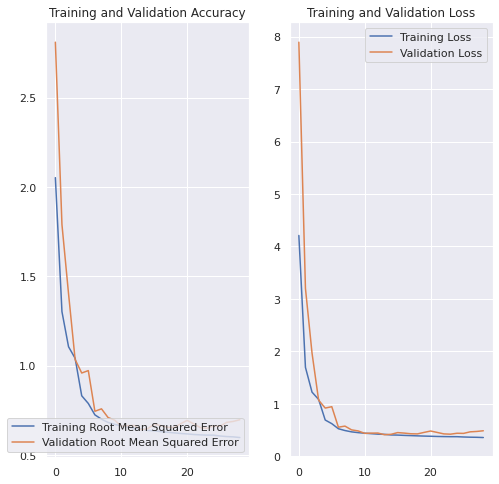

In [ ]:
# code for plotting the results from the model for loss and root mean square error
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(29)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 2

In [ ]:
model2 = Sequential()
model2.add(Dense(128, input_shape=(X_train_scaled.shape[1:]), kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.01)))

model2.add(Dense(64, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.01)))

model2.add(Dense(32, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.01)))

model2.add(Dense(16, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.01)))

model2.add(Dense(4, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.01)))

model2.add(Dense(1, kernel_initializer='uniform',activation='linear'))
	# Compile model
  
opt = Adam() 
model2.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               9344      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 4)                 68        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 20,281
Trainable params: 20,281
Non-trai

In [ ]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP2' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)


callbacks_list = [checkpoint, early_stopping]

In [ ]:

history = model2.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=100, batch_size=64, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
2290/2296 [============================>.] - ETA: 0s - loss: 11.5204 - root_mean_squared_error: 3.3942 - r2_score: -9.3738
Epoch 1: val_loss improved from inf to 11.78751, saving model to DMSP2_2022-09-0304_55_44.986686/model-00001-11.52069-3.39421-11.78751-3.43329.h5
2296/2296 [==============================] - 11s 4ms/step - loss: 11.5207 - root_mean_squared_error: 3.3942 - r2_score: -9.3697 - val_loss: 11.7875 - val_root_mean_squared_error: 3.4333 - val_r2_score: -10.9977
Epoch 2/100
2292/2296 [============================>.] - ETA: 0s - loss: 2.8061 - root_mean_squared_error: 1.6751 - r2_score: -1.4804
Epoch 2: val_loss improved from 11.78751 to 6.39279, saving model to DMSP2_2022-09-0304_55_44.986686/model-00002-2.81458-1.67767-6.39279-2.52840.h5
2296/2296 [==============================] - 10s 4ms/step - loss: 2.8146 - root_mean_squared_error: 1.6777 - r2_score: -1.4854 - val_loss: 6.3928 - val_root_mean_squared_error: 2.5284 - val_r2_score: -5.3819
Epoch 3/100
2287/2

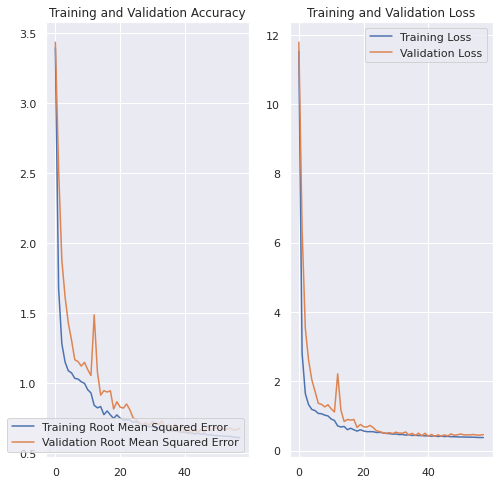

In [ ]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(58)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 3

In [ ]:
model3 = Sequential()
model3.add(Dense(128, input_shape=(X_train_scaled.shape[1:]), kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(64, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.02)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(36, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.02)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(8, kernel_initializer='uniform', activation=keras.layers.LeakyReLU(alpha=0.02)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(1, kernel_initializer='uniform',activation='linear'))
	# Compile model
  
opt = Adam(0.0001) 
model3.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               9344      
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 64)               

In [ ]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP3' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
#LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=0.0001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# LR = # write the REducelronplateau code here
callbacks_list = [checkpoint, early_stopping]

In [ ]:
history = model3.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=100, batch_size=100, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
1466/1470 [============================>.] - ETA: 0s - loss: 93.3300 - root_mean_squared_error: 9.6607 - r2_score: -89.2670
Epoch 1: val_loss improved from inf to 86.96483, saving model to DMSP3_2022-09-0305_07_33.458903/model-00001-93.34243-9.66139-86.96483-9.32549.h5
1470/1470 [==============================] - 13s 7ms/step - loss: 93.3424 - root_mean_squared_error: 9.6614 - r2_score: -89.2138 - val_loss: 86.9648 - val_root_mean_squared_error: 9.3255 - val_r2_score: -87.9135
Epoch 2/100
1464/1470 [============================>.] - ETA: 0s - loss: 82.1094 - root_mean_squared_error: 9.0614 - r2_score: -78.3028
Epoch 2: val_loss improved from 86.96483 to 69.05222, saving model to DMSP3_2022-09-0305_07_33.458903/model-00002-82.09523-9.06064-69.05222-8.30977.h5
1470/1470 [==============================] - 10s 7ms/step - loss: 82.0952 - root_mean_squared_error: 9.0606 - r2_score: -78.2599 - val_loss: 69.0522 - val_root_mean_squared_error: 8.3098 - val_r2_score: -69.4107
Epoch 3

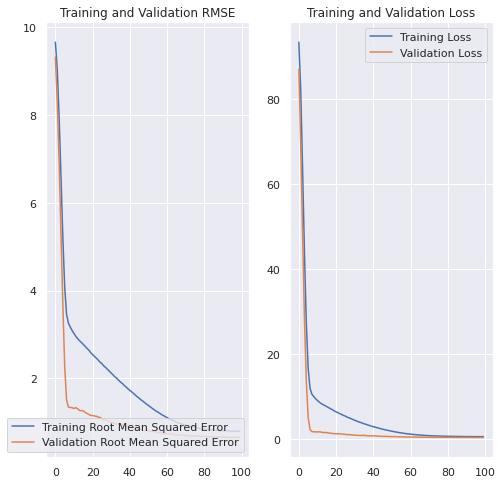

In [ ]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 4

In [ ]:
model4 = Sequential()
model4.add(Dense(256, input_shape=(X_train_scaled.shape[1:]), kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
model4.add(Dense(128, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
model4.add(Dense(64, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
model4.add(Dense(32, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
model4.add(Dense(16, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(1, kernel_initializer='normal',activation='linear'))
	# Compile model
  
opt = Adam(0.001)
model4.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [ ]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 256)               18688     
                                                                 
 batch_normalization_7 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_8 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 128)              

In [ ]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP4' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)


callbacks_list = [checkpoint, early_stopping]

In [ ]:
history = model4.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=100, batch_size=64, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
2294/2296 [============================>.] - ETA: 0s - loss: 20.2319 - root_mean_squared_error: 4.4980 - r2_score: -17.8245
Epoch 1: val_loss improved from inf to 1.39987, saving model to DMSP4_2022-09-0305_26_51.223067/model-00001-20.22287-4.49698-1.39987-1.18316.h5
2296/2296 [==============================] - 20s 8ms/step - loss: 20.2229 - root_mean_squared_error: 4.4970 - r2_score: -17.8120 - val_loss: 1.3999 - val_root_mean_squared_error: 1.1832 - val_r2_score: -0.3142
Epoch 2/100
2295/2296 [============================>.] - ETA: 0s - loss: 5.2162 - root_mean_squared_error: 2.2839 - r2_score: -4.1153
Epoch 2: val_loss improved from 1.39987 to 1.11064, saving model to DMSP4_2022-09-0305_26_51.223067/model-00002-5.21793-2.28428-1.11064-1.05387.h5
2296/2296 [==============================] - 18s 8ms/step - loss: 5.2179 - root_mean_squared_error: 2.2843 - r2_score: -4.1151 - val_loss: 1.1106 - val_root_mean_squared_error: 1.0539 - val_r2_score: -0.0579
Epoch 3/100
2295/2296

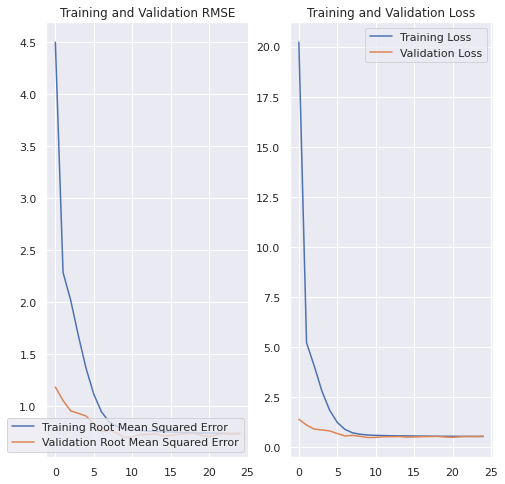

In [ ]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 5

In [ ]:
model5 = Sequential()
model5.add(Dense(512, input_shape=(X_train_scaled.shape[1:]), kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(256, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(128, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(64, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(32, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(16, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(8, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(4, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.02)))

model5.add(Dropout(0.25))
model5.add(Dense(1, kernel_initializer='normal',activation='linear'))
	# Compile model
  
opt = Adam(0.002) 
model5.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [ ]:
model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 512)               37376     
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 dense_39 (Dense)            (None, 256)               131328    
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_40 (Dense)            (None, 128)               32896     
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_41 (Dense)            (None, 64)               

In [ ]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP5' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
LR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, min_lr=0.001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

callbacks_list = [checkpoint, LR, early_stopping]

In [ ]:
history = model5.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=100, batch_size=64, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
2294/2296 [============================>.] - ETA: 0s - loss: 25.2353 - root_mean_squared_error: 5.0235 - r2_score: -23.7186
Epoch 1: val_loss improved from inf to 12.02244, saving model to DMSP5_2022-09-0305_40_23.180909/model-00001-25.23577-5.02352-12.02244-3.46734.h5
2296/2296 [==============================] - 14s 5ms/step - loss: 25.2358 - root_mean_squared_error: 5.0235 - r2_score: -23.7087 - val_loss: 12.0224 - val_root_mean_squared_error: 3.4673 - val_r2_score: -11.5681 - lr: 0.0020
Epoch 2/100
2288/2296 [============================>.] - ETA: 0s - loss: 5.5943 - root_mean_squared_error: 2.3652 - r2_score: -4.3883
Epoch 2: val_loss improved from 12.02244 to 1.07105, saving model to DMSP5_2022-09-0305_40_23.180909/model-00002-5.58715-2.36372-1.07105-1.03492.h5
2296/2296 [==============================] - 12s 5ms/step - loss: 5.5872 - root_mean_squared_error: 2.3637 - r2_score: -4.3804 - val_loss: 1.0711 - val_root_mean_squared_error: 1.0349 - val_r2_score: -0.0187 - l

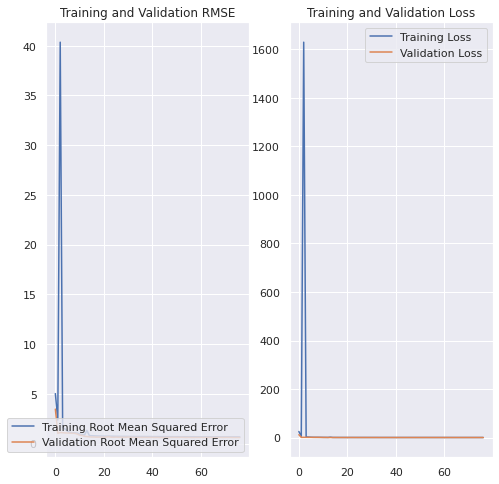

In [ ]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(77)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# as LSTM takes input in a particular format, we reshape the training and validation data
import numpy
train_X = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
#train_X = numpy.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
val_X = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

In [ ]:
train_X

array([[[-1.30186897, -5.92397314, -0.34384096, ...,  0.09523256,
         -0.54847415,  0.60543444]],

       [[-1.03008105, -5.92397314, -0.34985504, ...,  0.09523256,
         -0.54847415,  0.60543444]],

       [[-0.23205524, -5.92397314, -0.36785615, ...,  0.15030447,
         -0.66353677,  0.53624339]],

       ...,

       [[-1.72867869, -1.27842581, -1.39796897, ..., -1.4467809 ,
         -0.53340643, -0.043897  ]],

       [[-0.83030017, -1.27842581, -1.40084246, ..., -2.42889662,
         -0.51559912,  0.06787316]],

       [[ 1.25085749, -1.27842581, -1.33277228, ..., -0.13423373,
         -0.4388907 ,  0.06255078]]])

## Model 6

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm.add(Dense(1, activation='linear'))

opt = Adam(0.001) 
model_lstm.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [ ]:
model_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                35072     
                                                                 
 dense_47 (Dense)            (None, 1)                 65        
                                                                 
Total params: 35,137
Trainable params: 35,137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP6' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)


callbacks_list = [checkpoint, early_stopping]

In [ ]:
history = model_lstm.fit(train_X, y_train_log, validation_data=(val_X, y_val_log), epochs=100, batch_size=128, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
1148/1148 [==============================] - ETA: 0s - loss: 16.5866 - root_mean_squared_error: 4.0727 - r2_score: -13.6246
Epoch 1: val_loss improved from inf to 2.30468, saving model to DMSP6_2022-09-0306_00_38.092706/model-00001-16.58663-4.07267-2.30468-1.51812.h5
1148/1148 [==============================] - 11s 6ms/step - loss: 16.5866 - root_mean_squared_error: 4.0727 - r2_score: -13.6246 - val_loss: 2.3047 - val_root_mean_squared_error: 1.5181 - val_r2_score: -1.3174
Epoch 2/100
1138/1148 [============================>.] - ETA: 0s - loss: 1.4977 - root_mean_squared_error: 1.2238 - r2_score: -0.3292
Epoch 2: val_loss improved from 2.30468 to 1.38066, saving model to DMSP6_2022-09-0306_00_38.092706/model-00002-1.49437-1.22244-1.38066-1.17502.h5
1148/1148 [==============================] - 6s 5ms/step - loss: 1.4944 - root_mean_squared_error: 1.2224 - r2_score: -0.3279 - val_loss: 1.3807 - val_root_mean_squared_error: 1.1750 - val_r2_score: -0.3526
Epoch 3/100
1146/1148 

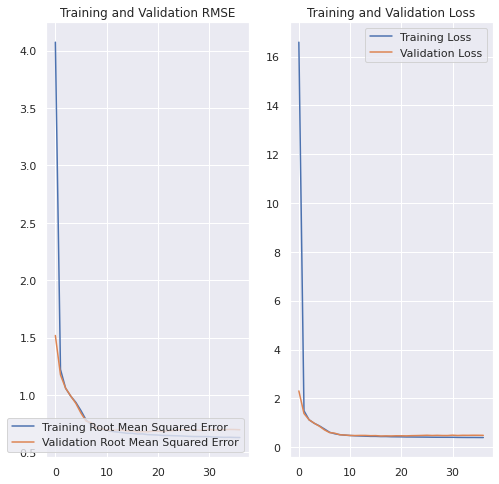

In [ ]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(37)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 7

In [ ]:
model_lstm2 = Sequential()
model_lstm2.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Dense(64, activation=keras.layers.LeakyReLU(alpha=0.02)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Dense(1, activation='linear'))
opt = Adam(0.001) 
model_lstm2.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [ ]:
model_lstm2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               336896    
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_48 (Dense)            (None, 64)                16448     
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_49 (Dense)            (None, 1)                 65        
                                                                 
Total params: 353,409
Trainable params: 353,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP7' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
history = model_lstm2.fit(train_X, y_train_log, validation_data=(val_X, y_val_log), epochs=100, batch_size=128, verbose=1, shuffle=False, callbacks=callbacks_list)

Epoch 1/100
1148/1148 [==============================] - ETA: 0s - loss: 10.9332 - root_mean_squared_error: 3.3065 - r2_score: -8.8045
Epoch 1: val_loss improved from inf to 5.40523, saving model to DMSP7_2022-09-0306_05_32.168174/model-00001-10.93315-3.30653-5.40523-2.32492.h5
1148/1148 [==============================] - 10s 6ms/step - loss: 10.9332 - root_mean_squared_error: 3.3065 - r2_score: -8.8045 - val_loss: 5.4052 - val_root_mean_squared_error: 2.3249 - val_r2_score: -4.4161
Epoch 2/100
1138/1148 [============================>.] - ETA: 0s - loss: 4.6908 - root_mean_squared_error: 2.1658 - r2_score: -3.3295
Epoch 2: val_loss improved from 5.40523 to 1.06287, saving model to DMSP7_2022-09-0306_05_32.168174/model-00002-4.68379-2.16421-1.06287-1.03096.h5
1148/1148 [==============================] - 7s 6ms/step - loss: 4.6838 - root_mean_squared_error: 2.1642 - r2_score: -3.3335 - val_loss: 1.0629 - val_root_mean_squared_error: 1.0310 - val_r2_score: -0.0150
Epoch 3/100
1143/1148 [=

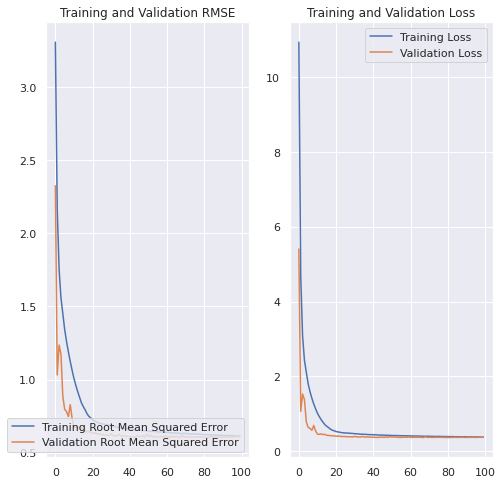

In [ ]:
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, rmse, label='Training Root Mean Squared Error')
plt.plot(epochs_range, val_rmse, label='Validation Root Mean Squared Error')
plt.legend(loc='lower right')
plt.title('Training and Validation RMSE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# LeakyReLU activation function is used instead of ReLU since the input features have negative values as well
import keras
model8 = Sequential()
model8.add(Dense(128, input_shape=(X_train_scaled.shape[1:]), activation = keras.layers.LeakyReLU(alpha=0.01)))

model8.add(Dense(64, activation=keras.layers.LeakyReLU(alpha=0.01)))
model8.add(Dropout(0.1))

model8.add(Dense(32, activation=keras.layers.LeakyReLU(alpha=0.01)))

model8.add(Dense(16, activation=keras.layers.LeakyReLU(alpha=0.01)))

model8.add(Dense(8, activation=keras.layers.LeakyReLU(alpha=0.01)))

model8.add(Dense(4, activation=keras.layers.LeakyReLU(alpha=0.01)))

model8.add(Dense(2, activation=keras.layers.LeakyReLU(alpha=0.01)))

model8.add(Dense(1, activation='linear'))
# Compile the model
opt = Adam(0.01) # specifying the optimizer used for the model
model8.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None),r2_score])

In [ ]:
model8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               9344      
                                                                 
 dense_51 (Dense)            (None, 64)                8256      
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_52 (Dense)            (None, 32)                2080      
                                                                 
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dense_54 (Dense)            (None, 8)                 136       
                                                                 
 dense_55 (Dense)            (None, 4)               

In [ ]:
curr_dt_time = datetime.datetime.now()
model_name = 'DMSP8' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{root_mean_squared_error:.5f}-{val_loss:.5f}-{val_root_mean_squared_error:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)


callbacks_list = [checkpoint, early_stopping]

In [ ]:
history = model8.fit(X_train_scaled,y_train_log, validation_data=(X_val_scaled, y_val_log), epochs=100, batch_size=64, verbose=1, callbacks=callbacks_list)

Epoch 1/100
2289/2296 [============================>.] - ETA: 0s - loss: 2.9045 - root_mean_squared_error: 1.7043 - r2_score: -1.6459
Epoch 1: val_loss improved from inf to 0.96039, saving model to DMSP8_2022-09-0306_24_05.032523/model-00001-2.89909-1.70267-0.96039-0.97999.h5
2296/2296 [==============================] - 12s 5ms/step - loss: 2.8991 - root_mean_squared_error: 1.7027 - r2_score: -1.6408 - val_loss: 0.9604 - val_root_mean_squared_error: 0.9800 - val_r2_score: 0.0562
Epoch 2/100
2295/2296 [============================>.] - ETA: 0s - loss: 0.7610 - root_mean_squared_error: 0.8724 - r2_score: 0.3332
Epoch 2: val_loss improved from 0.96039 to 0.81408, saving model to DMSP8_2022-09-0306_24_05.032523/model-00002-0.76093-0.87231-0.81408-0.90227.h5
2296/2296 [==============================] - 11s 5ms/step - loss: 0.7609 - root_mean_squared_error: 0.8723 - r2_score: 0.3332 - val_loss: 0.8141 - val_root_mean_squared_error: 0.9023 - val_r2_score: 0.1559
Epoch 3/100
2283/2296 [=======

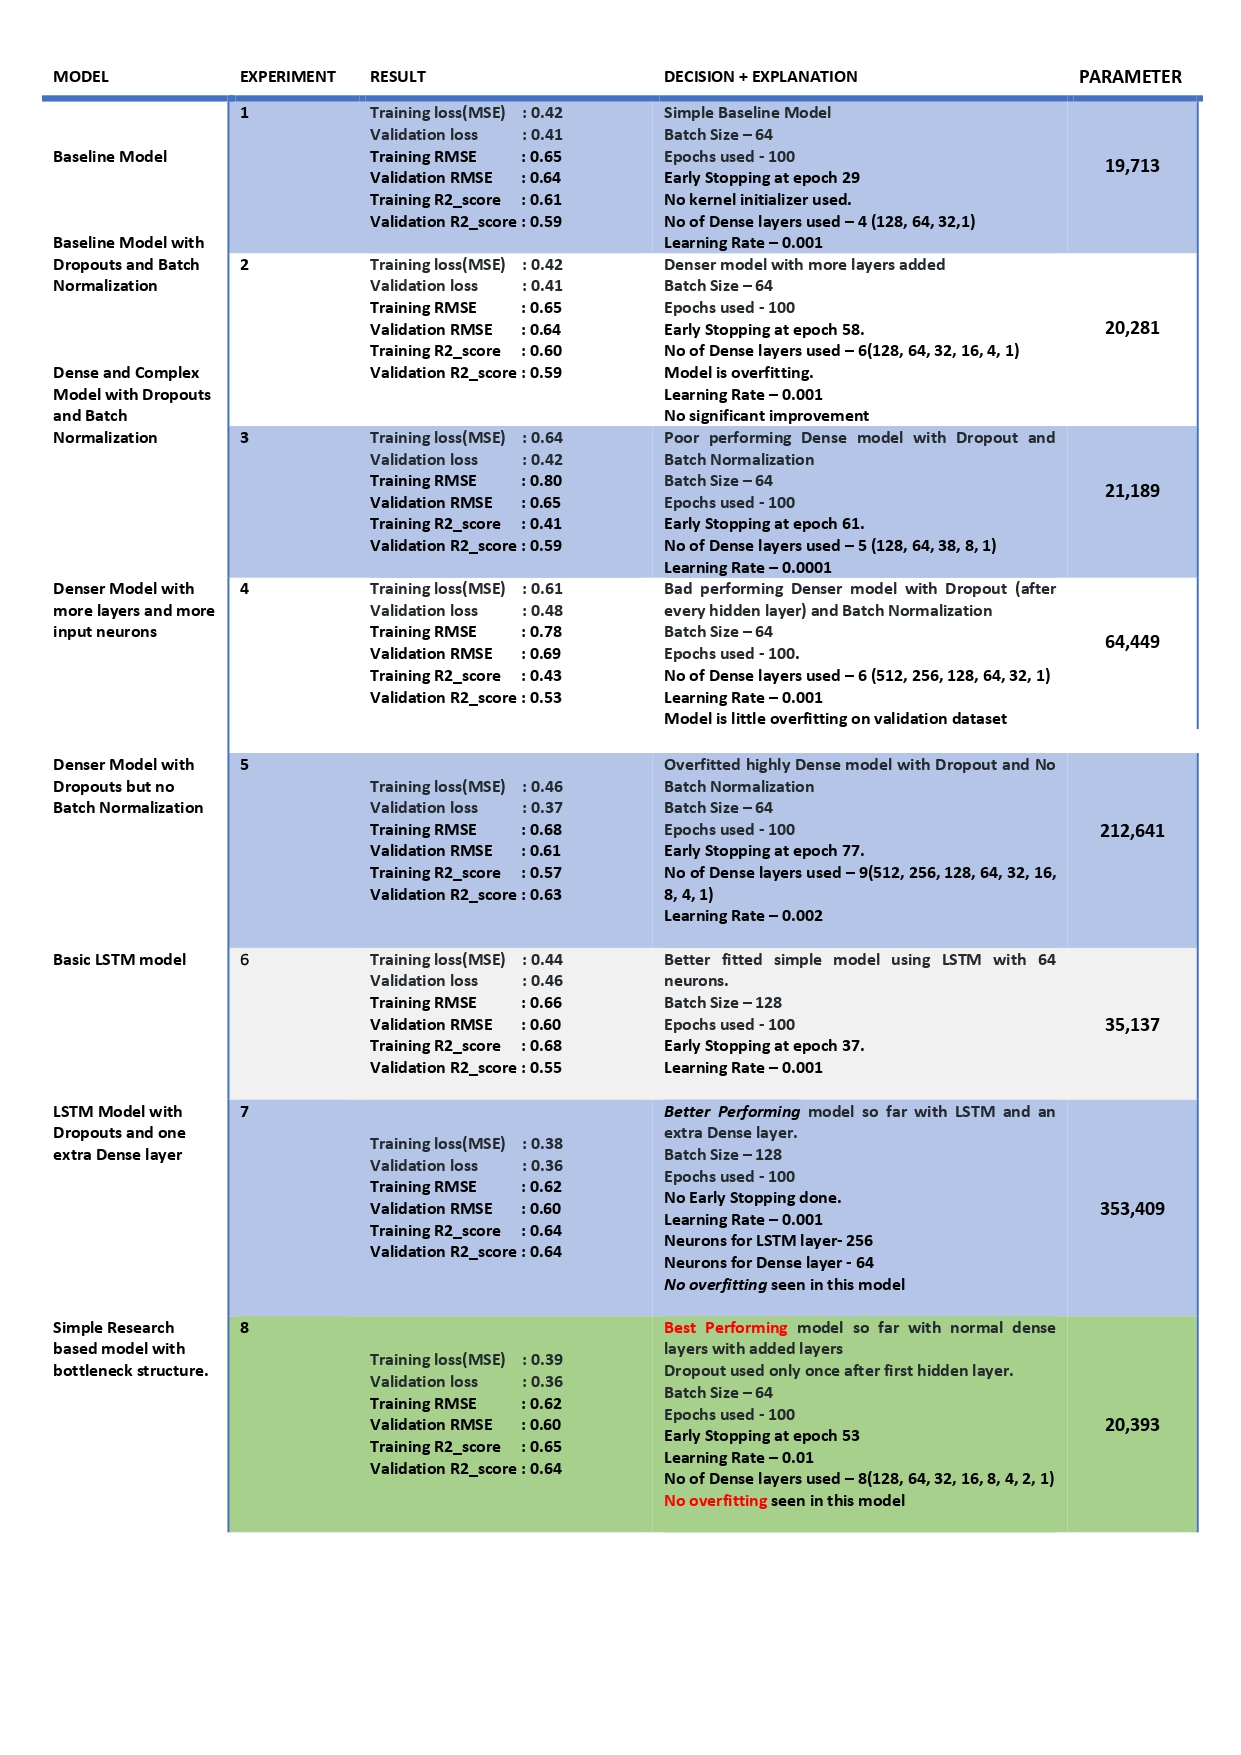

## Exploring the Results

In [ ]:
# check point for explaining predictions
data_explain = X_train_df.copy()

In [ ]:
# splitting the data into train and test for making predictions
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_explain, y_train_log, test_size = 0.2, shuffle = True, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((117544, 72), (29387, 72))

In [ ]:
# Resetting index
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [ ]:
!pip install --quiet shap==0.39.0

     |████████████████████████████████| 356 kB 4.3 MB/s 


In [ ]:
from keras.models import load_model
from tqdm import tqdm
import shap

In [ ]:
ml_model_save_file = os.path.join('final_model.h5')
final_model = load_model(ml_model_save_file, custom_objects={"r2_score": r2_score})

In [ ]:
# Prediction on the training set and the test set
y_train_pred = final_model.predict(X_train).flatten()
y_test_pred = final_model.predict(X_test).flatten()

In [ ]:
y_test_pred

array([ 9.508641,  9.281054,  9.32066 , ..., 11.326815,  9.02371 ,
        9.087902], dtype=float32)

In [ ]:
# Function to plot the error distribution
def error_dist(y_true, y_pred, figsize = (9, 6)):
    if len(y_true) != len(y_pred):
        raise Exception("The number of true values and the number of predicted values do not match.")
    else:
        plt.figure(figsize = figsize)
        sns.histplot(x = y_true - y_pred, bins = math.floor(len(y_true)**(1/3)))
        plt.title("Error distribution")
        plt.xlabel("error")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

In [ ]:
len(y_test_pred)

29387

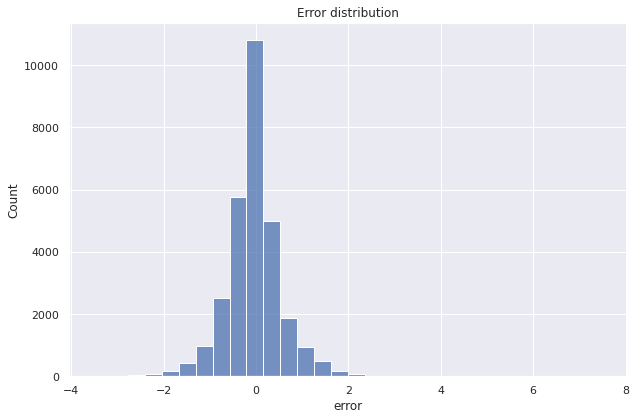

In [ ]:
# Error distribution
error_dist(y_test, y_test_pred)

## Explainable AI

In [ ]:
# Loading JavaScript library
shap.initjs()

# Sampling from test data predictors
X_test_sample = X_test.sample(100)

In [ ]:
# # Predicted values corresponding to the sample
y_test_pred_sample = np.array(pd.Series(data = y_test_pred, index = X_test.index)[X_test_sample.index])

# # Wrapper function
def wrap(X):
    return final_model.predict(X)

# # Explainer
explainer = shap.KernelExplainer(wrap , X_test_sample)

# # Computing SHAP values based on the sample
shap_values = explainer.shap_values(X_test_sample, nsamples = 500)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
np.shape(shap_values)

(1, 100, 72)

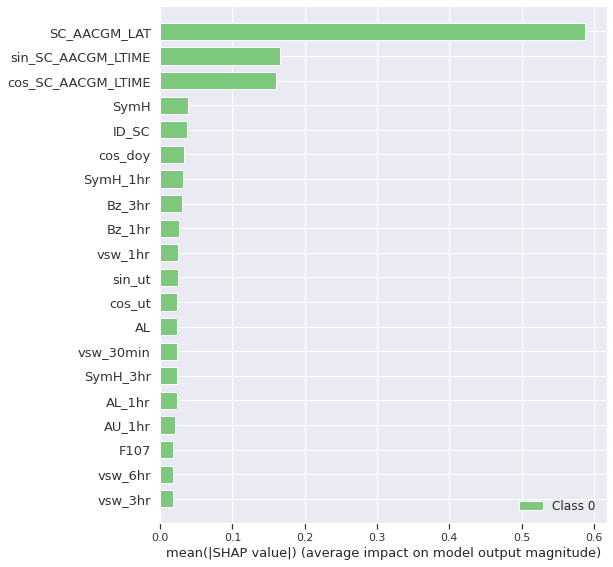

In [ ]:
# Summary plot
shap.summary_plot(shap_values = shap_values, features = X_test_sample, plot_type = 'bar', color=plt.get_cmap("Accent"))

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [ ]:

shap.initjs()
row = math.floor(len(X_test_sample)/2)
print(pd.Series({"Predicted value": y_test_pred_sample[row]}).to_string())
shap_values_row = explainer.shap_values(X_test_sample.iloc[row, :], nsamples = 500)
shap.force_plot(base_value = explainer.expected_value[0],
                shap_values = shap_values_row[0],
                features = X_test_sample.iloc[row, :],
                feature_names = X_test_sample.columns, plot_cmap="PkYg")

Predicted value    9.349735


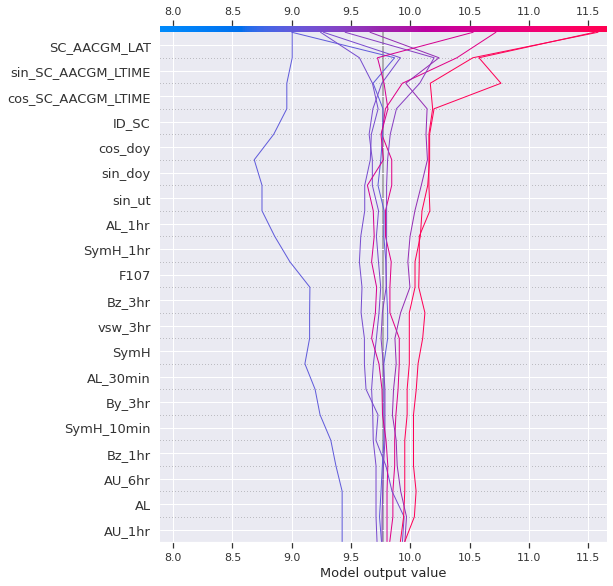

In [ ]:
select = range(20)
features = X_test.iloc[select]
expected_value = explainer.expected_value
shap.decision_plot(expected_value[0], shap_values[0][0:10], feature_names = [str(x) for x in X_test_sample.columns.tolist()], features = X_test_sample.iloc[0, :])

Predicted value    9.349735


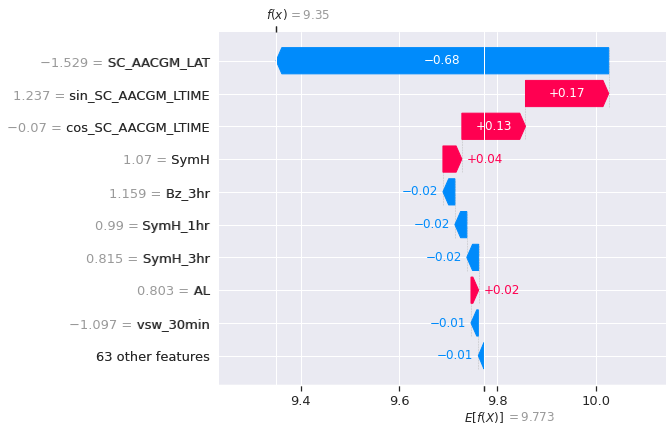

In [ ]:
# Waterfall plot
print(pd.Series({"Predicted value": y_test_pred_sample[row]}).to_string())
shap.waterfall_plot(shap.Explanation(values = shap_values_row[0],
                                     base_values = explainer.expected_value[0],
                                     data = X_test_sample.iloc[row, :],
                                     feature_names = [str(x) for x in X_test_sample.columns.tolist()]))